In [1]:
import pandas as pd
import numpy as np

In [2]:
tweet = pd.read_csv('narendramodi_tweets.csv')
tweet.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [3]:
tweet.shape

(3220, 14)

In [4]:
tweet.describe()

,id,retweets_count,favorite_count,followers_count,friends_count,hashtags_count
count,3.220000e+03,3220.000000,3220.000000,3.220000e+03,3220.0,3220.000000
mean,7.674588e+17,2051.080745,6026.295652,2.681000e+07,1641.0,0.261801
std,3.209171e+16,1858.162796,5894.078915,2.487437e+01,0.0,0.600895
min,7.075420e+17,125.000000,0.000000,2.680996e+07,1641.0,0.000000
25%,7.410862e+17,1081.000000,2811.250000,2.680998e+07,1641.0,0.000000
50%,7.675728e+17,1570.000000,4658.500000,2.681000e+07,1641.0,0.000000
75%,7.926601e+17,2341.500000,7741.750000,2.681003e+07,1641.0,0.000000
max,8.263846e+17,21888.000000,52649.000000,2.681004e+07,1641.0,7.000000


In [5]:
tweet.dtypes

id                      float64
retweets_count          float64
favorite_count          float64
created_at               object
text                     object
lang                     object
retweeted                  bool
followers_count         float64
friends_count           float64
hashtags_count          float64
description              object
location                 object
background_image_url     object
source                   object
dtype: object

In [6]:
from datetime import datetime

In [7]:
tweet['date'] = pd.to_datetime(tweet['created_at'],format = '%Y-%m-%d %H:%M:%S')
tweet['date'].head()

0   2017-01-31 11:00:07
1   2017-01-31 10:59:12
2   2017-01-31 10:52:33
3   2017-01-31 10:52:22
4   2017-01-31 10:52:16
Name: date, dtype: datetime64[ns]

# Bag-of-word analysis to know what are the used in the tweets. It tells which word repeated more number of times(frequency of each word) and bag of word is pictorial representtation of this.

# It doent take multiple strings, so we need to join all the paragraphs as one.

In [9]:
#!pip install wordcloud

In [10]:
from wordcloud import WordCloud

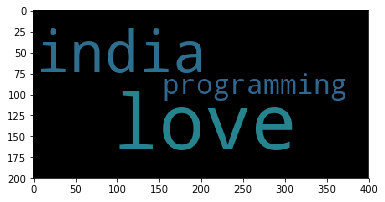

In [12]:
import matplotlib.pyplot as plt
wc = WordCloud().generate('i love india,i love programming')
                        
plt.imshow(wc)

# Now lets check for modi tweets.

**First lets join all the words in the tweets.**

In [13]:
' '.join(tweet['text'])

'The President\'s address wonderfully encapsulated India\'s strengths, aspirations, potential &amp; the efforts towards #TransformingIndia. Rashtrapati Ji\'s address to both Houses of Parliament was in-depth &amp; extensive. Do hear. https://t.co/rdKQtjgNNx @RashtrapatiBhvn RT @PMOIndia: Empowering the marginalised. https://t.co/wwsqgW94Dk RT @PMOIndia: Commitment to welfare of farmers. https://t.co/P7AAfRfmrC RT @PMOIndia: Improving the quality of life for the poor. https://t.co/8ugm25VK2Z RT @PMOIndia: Financial inclusion for poverty alleviation. https://t.co/5xT2ZyhHTE RT @RashtrapatiBhvn: The four-decade old demand of one-rank-one-pension (OROP) of our Armed Forces veterans has been fulfilled #PresidentMu… RT @RashtrapatiBhvn: My Government has taken bold decisions in the interest of the poor #PresidentMukherjee RT @RashtrapatiBhvn: Under its proactive "Act East" policy, my govt is focussing on reducing isolation of the Eastern region &amp; North-east… RT @RashtrapatiBhvn: Through 

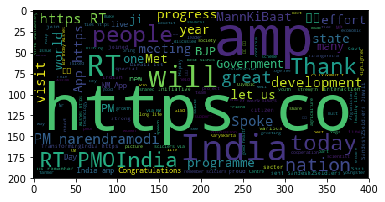

In [14]:
wc = WordCloud().generate(' '.join(tweet['text']))                        
plt.imshow(wc)

## Text tranformation or Text cleaning
- Convert every character to lowercase
- Remove special characters, numbers
- Remove common stop words(of, the, is was...), junk words
- Identify root of the word(Stemming)

In [15]:
docs = tweet['text'].str.lower()
docs

0       the president's address wonderfully encapsulat...
1       rashtrapati ji's address to both houses of par...
2       rt @pmoindia: empowering the marginalised. htt...
3       rt @pmoindia: commitment to welfare of farmers...
4       rt @pmoindia: improving the quality of life fo...
5       rt @pmoindia: financial inclusion for poverty ...
6       rt @rashtrapatibhvn: the four-decade old deman...
7       rt @rashtrapatibhvn: my government has taken b...
8       rt @rashtrapatibhvn: under its proactive "act ...
9       rt @rashtrapatibhvn: through stand-up india in...
10      rt @rashtrapatibhvn: pradhan mantri fasal bima...
11      rt @rashtrapatibhvn: my government has taken v...
12      rt @rashtrapatibhvn: my government is committe...
13      rt @rashtrapatibhvn: my government has taken m...
14      rt @rashtrapatibhvn: at the core of all my gov...
15      rt @rashtrapatibhvn: janashakti has transforme...
16      rt @rashtrapatibhvn: resilience &amp; forbeara...
17      rt @ra

## Regular Expression : to extract those words or number which follows a regular pattern(like ph.num where all numbers have 10 digits and mail ids which has @ in common for all mails).

In [16]:
#temporary replacement(since we are not redirecting to a new var)
docs.str.replace('the','-').head()
docs.str.replace('rt','').head()#SIMPLY REMOVING THAT WORD
docs.str.replace('[a-z]','').head()#removing all the alphabets
docs.str.replace('[0-9]','').head()#removing all numbers

0    - president's address wonderfully encapsulated...
1    rashtrapati ji's address to both houses of par...
2    rt @pmoindia: empowering - marginalised. https...
3    rt @pmoindia: commitment to welfare of farmers...
4    rt @pmoindia: improving - quality of life for ...
Name: text, dtype: object

In [19]:
docs = docs.str.replace('[^a-z #@]','') # ^ means retaining everything which has a-z(alphabets),spaces,hashtags,@ and remove everything else.

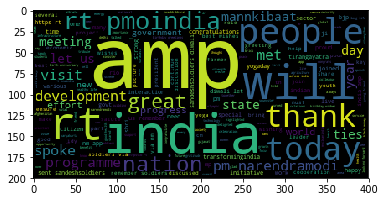

In [20]:
wc = WordCloud().generate(' '.join(docs))                       
plt.imshow(wc)

**Now we remove stop words**

In [21]:
import nltk

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\TARUN AERVA
[nltk_data]     TEJA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
stop_words = nltk.corpus.stopwords.words('english')
len(stop_words)

179

In [23]:
junk_words = ['amp','rt','http','will']
stop_words.extend(junk_words)
len(stop_words)

183

In [24]:
docs

0       the presidents address wonderfully encapsulate...
1       rashtrapati jis address to both houses of parl...
2       rt @pmoindia empowering the marginalised https...
3       rt @pmoindia commitment to welfare of farmers ...
4       rt @pmoindia improving the quality of life for...
5       rt @pmoindia financial inclusion for poverty a...
6       rt @rashtrapatibhvn the fourdecade old demand ...
7       rt @rashtrapatibhvn my government has taken bo...
8       rt @rashtrapatibhvn under its proactive act ea...
9       rt @rashtrapatibhvn through standup india init...
10      rt @rashtrapatibhvn pradhan mantri fasal bima ...
11      rt @rashtrapatibhvn my government has taken va...
12      rt @rashtrapatibhvn my government is committed...
13      rt @rashtrapatibhvn my government has taken ma...
14      rt @rashtrapatibhvn at the core of all my govt...
15      rt @rashtrapatibhvn janashakti has transformed...
16      rt @rashtrapatibhvn resilience amp forbearance...
17      rt @ra

## Stemming - Not all the time good to use

In [25]:
stemmer = nltk.PorterStemmer()
stemmer.stem('playing')
stemmer.stem('played')
stemmer.stem('organization')

'organ'

## Here, we are removing the words present in stop words and also we are finding out the root word words.

In [26]:
def clean_text(row_text):
    #print(type(row_text))
    row_words = row_text.split(' ')
    #print(row_words)
    row_words = [stemmer.stem(word) for word in row_words \
                 if word not in stop_words]#checking if each word in a row and comparing if it is there in stop words, we dont want it so we remove it
    #print(row_words)
    #print('------------------------')
    return ' '.join(row_words)
docs_clean = docs.apply(lambda v: clean_text(v))
docs_clean.head()

0    presid address wonder encapsul india strength ...
1    rashtrapati ji address hous parliament indepth...
2          @pmoindia empow marginalis httpstcowwsqgwdk
3     @pmoindia commit welfar farmer httpstcopaafrfmrc
4    @pmoindia improv qualiti life poor httpstcougmvkz
Name: text, dtype: object

In [27]:
docs

0       the presidents address wonderfully encapsulate...
1       rashtrapati jis address to both houses of parl...
2       rt @pmoindia empowering the marginalised https...
3       rt @pmoindia commitment to welfare of farmers ...
4       rt @pmoindia improving the quality of life for...
5       rt @pmoindia financial inclusion for poverty a...
6       rt @rashtrapatibhvn the fourdecade old demand ...
7       rt @rashtrapatibhvn my government has taken bo...
8       rt @rashtrapatibhvn under its proactive act ea...
9       rt @rashtrapatibhvn through standup india init...
10      rt @rashtrapatibhvn pradhan mantri fasal bima ...
11      rt @rashtrapatibhvn my government has taken va...
12      rt @rashtrapatibhvn my government is committed...
13      rt @rashtrapatibhvn my government has taken ma...
14      rt @rashtrapatibhvn at the core of all my govt...
15      rt @rashtrapatibhvn janashakti has transformed...
16      rt @rashtrapatibhvn resilience amp forbearance...
17      rt @ra

# Now we completed all the text transformations

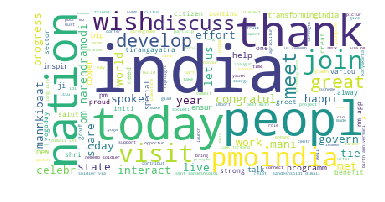

In [28]:
wc = WordCloud(background_color = 'White').generate(' '.join(docs_clean))                       
plt.imshow(wc)
plt.axis('off');

In [29]:
hashtags = []

In [30]:
for row in docs_clean:
    row_words = row.split(' ')
    row_hashtags = [word for word in row_words if word.startswith('#')]
    hashtags.extend(row_hashtags)
hashtags

['#transformingindia',
 '#presidentmu',
 '#presidentmukherje',
 '#pr',
 '#presidentmukherje',
 '#presidentmukherje',
 '#presidentmukherje',
 '#',
 '#presidentmukherje',
 '#presidentmukherje',
 '#presidentmukherje',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#stressfreeexam',
 '#mannkibaat',
 '#republicday',
 '#republicday',
 '#republicday',
 '#republicday',
 '#republicday',
 '#',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#pbd',
 '#pbd',
 '#pbd',
 '#thprakashparv',
 '#thprakashparv',
 '#thprakashparv',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#mannkibaat',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#demonetis',
 '#digitalpay',
 '#digitalpay',
 '#digitalpay',
 '#digidhanmela',
 '#digitalpay',
 '#digidhanabhiyan',
 '#digidhanabhiyan',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#shivsmarak',

In [31]:
hashtags

['#transformingindia',
 '#presidentmu',
 '#presidentmukherje',
 '#pr',
 '#presidentmukherje',
 '#presidentmukherje',
 '#presidentmukherje',
 '#',
 '#presidentmukherje',
 '#presidentmukherje',
 '#presidentmukherje',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#stressfreeexam',
 '#mannkibaat',
 '#republicday',
 '#republicday',
 '#republicday',
 '#republicday',
 '#republicday',
 '#',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#pbd',
 '#pbd',
 '#pbd',
 '#thprakashparv',
 '#thprakashparv',
 '#thprakashparv',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#mannkibaat',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#demonetis',
 '#digitalpay',
 '#digitalpay',
 '#digitalpay',
 '#digidhanmela',
 '#digitalpay',
 '#digidhanabhiyan',
 '#digidhanabhiyan',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#shivsmarak',

In [32]:
freq_hashtags = pd.Series(hashtags).value_counts()
freq_hashtags.head()

#sandeshsoldi         110
#mannkibaat            92
#tirangayatra          84
#yogaday               53
#transformingindia     52
dtype: int64

In [33]:
freq_hashtags

#sandeshsoldi                             110
#mannkibaat                                92
#tirangayatra                              84
#yogaday                                   53
#transformingindia                         52
#idi                                       44
#mycleanindia                              24
#rio                                       19
#                                          14
#digidhanmela                              11
#iyd                                        9
#happydiwali                                9
#yoga                                       9
#paralymp                                   9
#presidentmukherje                          9
#diwali                                     8
#swachhbharat                               8
#internationalyogaday                       7
#republicday                                5
#digitalpay                                 5
#narendramodi                               4
#gandhijayanti                    

In [34]:
type(hashtags)

list

## Frequency of hashtag - #sandeshsoldi accross month?

In [35]:
tweet['year_month'] = tweet['date'].dt.strftime('%Y-%m')

In [37]:
tweet[['date','year_month']].head()

,date,year_month
0,2017-01-31 11:00:07,2017-01
1,2017-01-31 10:59:12,2017-01
2,2017-01-31 10:52:33,2017-01
3,2017-01-31 10:52:22,2017-01
4,2017-01-31 10:52:16,2017-01


In [38]:
tweet['sandeshsoldi'] = docs_clean.apply(lambda v: 1 if 'sandeshsoldi' in v else 0 )

In [39]:
tweet['sandeshsoldi'].value_counts()

0    3105
1     115
Name: sandeshsoldi, dtype: int64

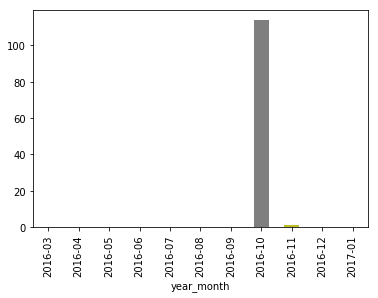

In [40]:
tweet.groupby('year_month')['sandeshsoldi'].sum().plot(kind = 'bar')

In [41]:
tweet['mannkibaat'] = docs_clean.apply(lambda v: 1 if 'mannkibaat' in v else 0 )

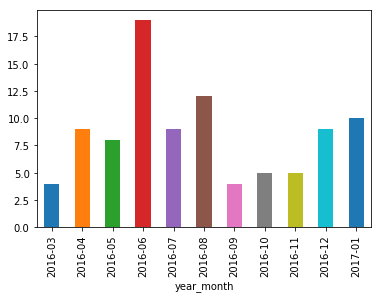

In [42]:
tweet.groupby('year_month')['mannkibaat'].sum().plot(kind = 'bar')

In [43]:
tweet['mannkibaat'] = docs_clean.apply(lambda v: 1 if 'mannkibaat' in v else 0 )

# Unstructured Data to Structured Data

## DTM
- Term - Collection of words
- if term contains only 1 word, it is called UniGram
- if it contains two words, it is called BiGram
- if 3 words, it is called TriGram


## DTM Properties:
- High dimension
- Sparse matrix(we have am ximum zeros(90%))
- ColSums = freq(Term accross all the documents)
- RowSums = Total nuber of words in that document

In [44]:
amazon = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/amazon_reviews.csv')
amazon.head()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [164]:
docs = amazon['reviewText'].fillna('').str.lower().str.replace('[^a-z ]','')
docs.head()

0    we got this gps for my husband who is an otr o...
1    im a professional otr truck driver and i bough...
2    well what can i say  ive had this unit in my t...
3    not going to write a long review even thought ...
4    ive had mine for a year and heres what we got ...
Name: reviewText, dtype: object

In [165]:
def clean_text(row):
    row_words = row.split(' ')
    clean_words = [word for word in row_words if word not in stop_words]
    return ' '.join(clean_words)
docs_clean = docs.apply(clean_text)
docs_clean.head()

0    got gps husband otr road trucker  impressed sh...
1    im professional otr truck driver bought tnd  t...
2    well say  ive unit truck four days  prior garm...
3    going write long review even thought unit dese...
4    ive mine year heres got tries route non truck ...
Name: reviewText, dtype: object

In [166]:
from sklearn.feature_extraction.text import CountVectorizer

In [168]:
cv = CountVectorizer()
sparse_matrix = cv.fit_transform(docs_clean)
sparse_matrix

<999x9438 sparse matrix of type '<class 'numpy.int64'>'
	with 55732 stored elements in Compressed Sparse Row format>

## Very Important to know every thing about below matrix

In [174]:
numpy_matrix = sparse_matrix.toarray()
df_dtm = pd.DataFrame(numpy_matrix, columns = cv.get_feature_names())
df_dtm

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
df_dtm.shape #High dimension data

(999, 9438)

In [177]:
(df_dtm == 0).sum().sum() / (df_dtm.shape[0]*df_dtm.shape[1]) #IT GIVES NUMBER OF ZEROS

0.9940890243920547

## Term Frequency

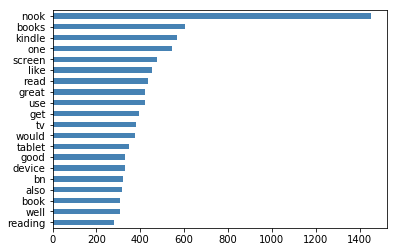

In [185]:
df_dtm.sum().sort_values(ascending = False).head(20)[::-1].plot.barh(color = 'steelblue')

## Identifying Biggest Document

In [186]:
df_dtm.sum(axis = 1).sort_values(ascending = False)

387    1064
273     971
563     766
552     703
248     689
584     656
329     624
251     608
411     608
554     575
557     571
352     550
410     546
628     541
335     521
353     498
237     478
579     447
710     433
391     428
2       414
454     413
252     396
577     390
385     390
306     387
526     375
355     360
415     357
416     355
       ... 
736       9
527       9
191       9
29        9
179       9
824       9
968       9
836       9
838       9
954       9
178       8
768       8
830       8
54        8
163       8
166       8
441       8
802       8
643       7
45        7
393       7
965       7
853       6
920       6
18        5
361       5
691       4
595       3
149       0
293       0
Length: 999, dtype: int64

In [196]:
amazon.loc[387]['reviewText']

'EDIT - Update 1.4.1 (12/21/2011): BIG update rolled out on December 14th, with lots of big changes, most of which really improved the device.First, the "n" key, which originally functioned as a home key taking you back to the original home screen, now functions as the menu key instead, like on the new Nook Tablet. Prior, there was a softkey arrow that would bring up the menu function, and Barnes and Noble has moved that function to strictly hardware. I\'m torn about whether I like this update, because honestly, I don\'t like relying just on a hardware key for something like a menu, especially with the issues I\'ve had with Nook parts (I\'ve owned two cords in the past year alone.) It does makes multi-taking easier, when switching from one application to another (say reading to internet), because you don\'t have to go to the home menu function first. For those of us Nook Color originals, it takes adjusting from old habits, but so far, it\'s not a bad change.The reader application funct

In [199]:
frequent_words = df_dtm.sum().sort_values(ascending = False).head(20).index
df_dtm[frequent_words].corr()
words_correlation = df_dtm[frequent_words].corr()

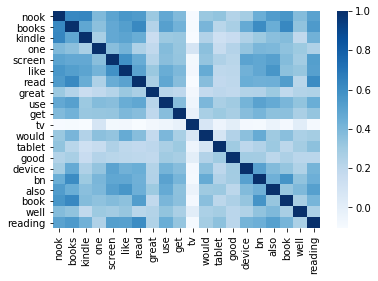

In [200]:
import seaborn as sns
sns.heatmap(words_correlation, cmap = 'Blues')

## Words Similarity (Sematic Analysis)
- Similarity for text analysis is not correlation but the cosine similarity

In [201]:
from sklearn.metrics.pairwise import cosine_similarity

In [202]:
cos_sim = cosine_similarity([df_dtm['book'], df_dtm['kindle']])
cos_sim

array([[1.        , 0.43291729],
       [0.43291729, 1.        ]])

In [204]:
cos_sim = pd.DataFrame(cosine_similarity(df_dtm.T),
                      index  = df_dtm.columns,
                      columns = df_dtm.columns)
cos_sim

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
aaa,1.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
aac,0.0,1.0000,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
abandoning,0.0,0.0000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
abilities,0.0,0.5000,0.0,1.000000,0.051848,0.032616,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.387298,0.000000,0.0,0.000000
ability,0.0,0.0000,0.0,0.051848,1.000000,0.202930,0.103695,0.000000,0.000000,0.0,...,0.000000,0.119737,0.00000,0.207390,0.000000,0.000000,0.133870,0.207390,0.0,0.073324
able,0.0,0.0000,0.0,0.032616,0.202930,1.000000,0.065233,0.195698,0.000000,0.0,...,0.065233,0.037662,0.00000,0.260931,0.130466,0.000000,0.168430,0.260931,0.0,0.000000
abnormally,0.0,0.0000,0.0,0.000000,0.103695,0.065233,1.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
aboutdo,0.0,0.0000,0.0,0.000000,0.000000,0.195698,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
aboutif,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
absence,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [205]:
def get_similar_words(word,cos_sim):
    cos_sim_word = cos_sim[word].sort_values(ascending = False).drop(word).head(5).index
    return list(cos_sim_word)
get_similar_words('touch',cos_sim)

['screen', 'kindle', 'page', 'books', 'nook']

## Bigrams

In [208]:
cv = CountVectorizer(ngram_range = (2,2))
sparse_matrix = cv.fit_transform(docs_clean)
numpy_matrix = sparse_matrix.toarray()
df_dtm = pd.DataFrame(numpy_matrix, columns = cv.get_feature_names())
df_dtm

,aaa batteries,aac soundtracks,abandoning normal,abilities aware,abilities full,abilities screen,abilities stripped,ability add,ability borrow,ability box,...,zoom rotate,zoom text,zoom type,zoom use,zooming awkward,zooming features,zooming scrolling,zooms touch,zune ive,zune place
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
df_dtm.shape

(999, 57437)